In [4]:
import os
import glob
import random
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import streamlit as st

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

c:\Users\USER\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [5]:
train_csv = pd.read_csv("D:\Human Action Recognition\Training_set.csv")
test_csv = pd.read_csv("D:\Human Action Recognition/Testing_set.csv")

In [6]:
train_fol = glob.glob("D:\\Human Action Recognition\\train\\*")
test_fol = glob.glob("D:\\Human Action Recognition\\test\\*")

In [7]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [8]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [9]:
import plotly.express as px
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()

In [10]:
filename = train_csv['filename']

situation = train_csv['label']

In [11]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [12]:
situation

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

In [13]:
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "D:/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

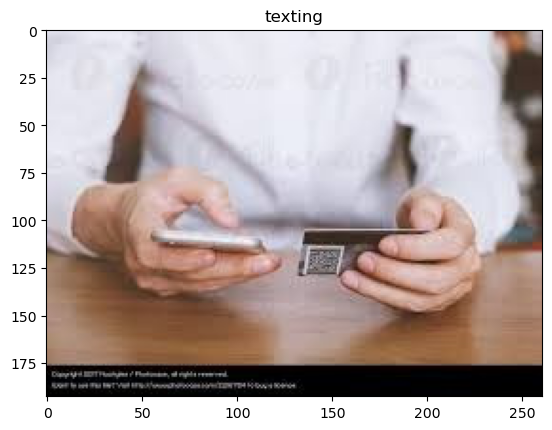

In [14]:
disp()

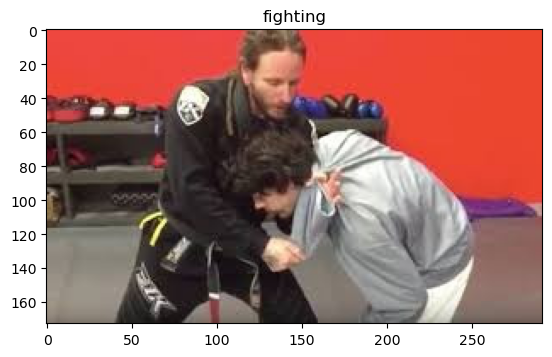

In [15]:
disp()

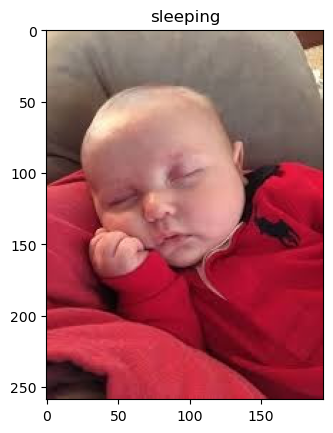

In [14]:
disp()

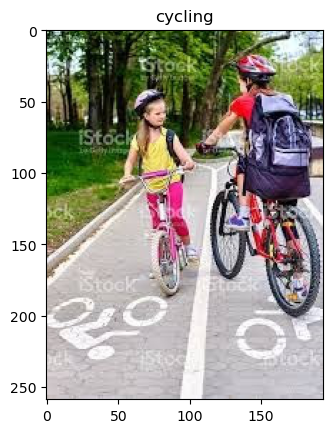

In [15]:
disp()

In [16]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = "D:/Human Action Recognition/train/" + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [17]:
inp_shape = (160, 160,3)

In [18]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [19]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))


c:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [24]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
vgg_model.save('HARpretrained_model.h5')

In [23]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14985039 (57.16 MB)
Trainable params: 270351 (1.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [23]:
history = vgg_model.fit(iii,y_train, epochs=20)

Epoch 1/20
394/394 [==============================] - 2049s 5s/step - loss: 2.1918 - accuracy: 0.4466
Epoch 2/20
394/394 [==============================] - 1997s 5s/step - loss: 1.2203 - accuracy: 0.6054
Epoch 3/20
394/394 [==============================] - 2013s 5s/step - loss: 0.9504 - accuracy: 0.6887
Epoch 4/20
394/394 [==============================] - 2137s 5s/step - loss: 0.7309 - accuracy: 0.7631
Epoch 5/20
394/394 [==============================] - 2082s 5s/step - loss: 0.5490 - accuracy: 0.8212
Epoch 6/20
394/394 [==============================] - 2059s 5s/step - loss: 0.4140 - accuracy: 0.8618
Epoch 7/20
394/394 [==============================] - 2002s 5s/step - loss: 0.3062 - accuracy: 0.8981
Epoch 8/20
394/394 [==============================] - 1984s 5s/step - loss: 0.2227 - accuracy: 0.9279
Epoch 9/20
394/394 [==============================] - 2066s 5s/step - loss: 0.1636 - accuracy: 0.9502
Epoch 10/20
394/394 [==============================] - 3575s 9s/step - loss: 0.152

In [23]:
vgg_model.save_weights("HARmodel.h5")

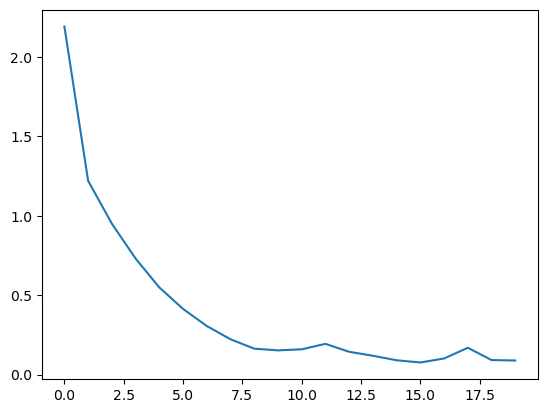

In [25]:
losss = history.history['loss']
plt.plot(losss)

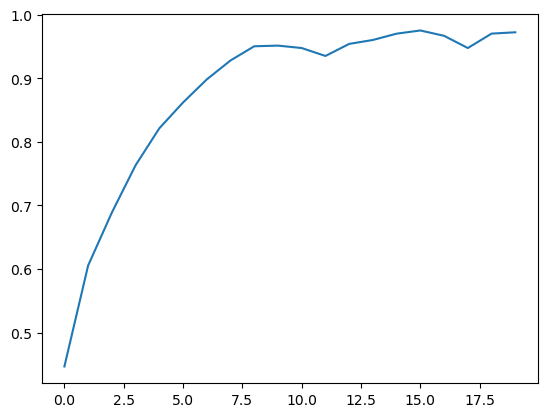

In [26]:
accu = history.history['accuracy']
plt.plot(accu)

In [24]:
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [25]:
def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 0s 315ms/step
probability: 72.44493961334229%
Predicted class :  2


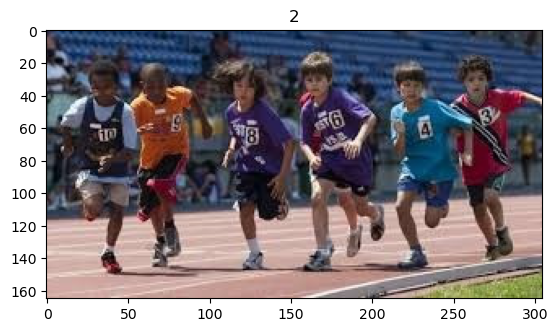

In [30]:
test_predict('D:/Human Action Recognition/test/Image_85.jpg')

1/1 [==============================] - 0s 326ms/step
probability: 49.2603600025177%
Predicted class :  0


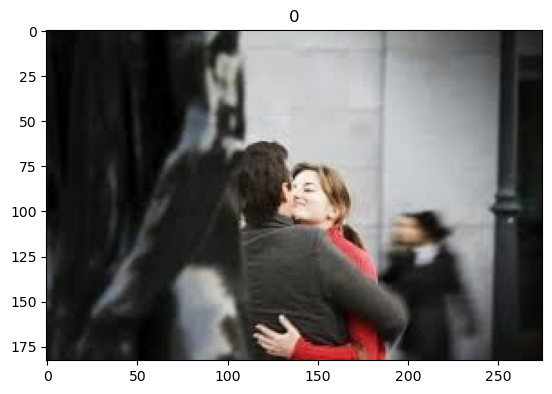

In [29]:
test_predict('D:/Human Action Recognition/test/Image_627.jpg')

1/1 [==============================] - 0s 330ms/step
probability: 99.99645948410034%
Predicted class :  2


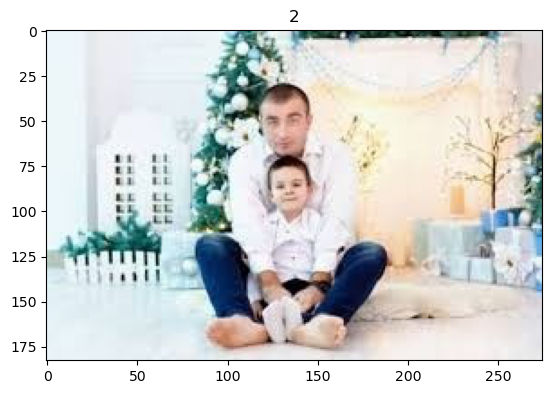

In [28]:
test_predict('D:/Human Action Recognition/test/Image_3324.jpg')

1/1 [==============================] - 0s 443ms/step
probability: 99.99510049819946%
Predicted class :  2


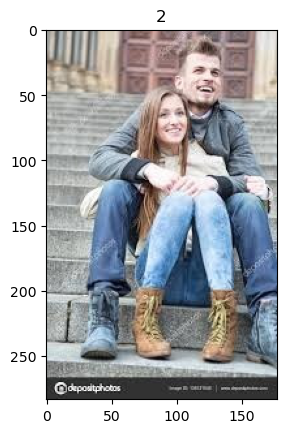

In [31]:
test_predict('D:/Human Action Recognition/test/Image_5067.jpg')

1/1 [==============================] - 0s 396ms/step
probability: 65.40191769599915%
Predicted class :  12


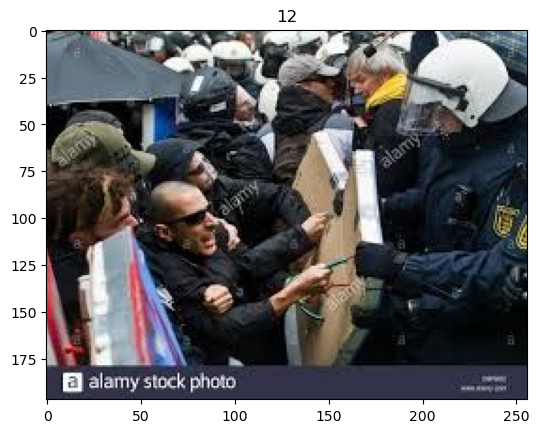

In [32]:
test_predict('D:/Human Action Recognition/test/Image_324.jpg')